In [16]:
!pip install wget
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import wget

In [17]:

data = np.loadtxt('EnergiaPotencialGas2D.txt')
print (data)

[[0.00000000e+00 4.24886974e+02]
 [1.00000000e-03 4.24178958e+02]
 [2.00000000e-03 4.22153552e+02]
 ...
 [7.99700000e+00 0.00000000e+00]
 [7.99800000e+00 0.00000000e+00]
 [7.99900000e+00 0.00000000e+00]]


In [18]:
#b) Quitar el valor medio de la energía potencial

t = data [:,0]

mean = np.mean(data[:,1])
Ep = data[:,1] - mean

In [19]:
#c) Encontrar la fft

fft = np.fft.fft(Ep)
Npoints = len(Ep)
print(fft)

[8.15703061e-12    +0.j         2.21915092e+04 +2824.49777555j
 7.24239673e+03-20665.16965404j ... 2.84696020e+04+11985.90094138j
 7.24239673e+03+20665.16965404j 2.21915092e+04 -2824.49777555j]


In [20]:
#d) fftfreq

Frequencies = np.fft.fftfreq(Npoints,1)
print(Frequencies)

[ 0.        0.000125  0.00025  ... -0.000375 -0.00025  -0.000125]


In [21]:
#e) Encontrar Tao

ffta = np.abs(fft)

mask1 = Frequencies < 0 
ffta[mask1] = 0

NewFreq = np.arange(len(fft))

i = np.argmax(ffta)
FreqMax = Frequencies[i]

Tao = 1/(FreqMax)
print (Tao)

800.0


<Figure size 640x480 with 0 Axes>

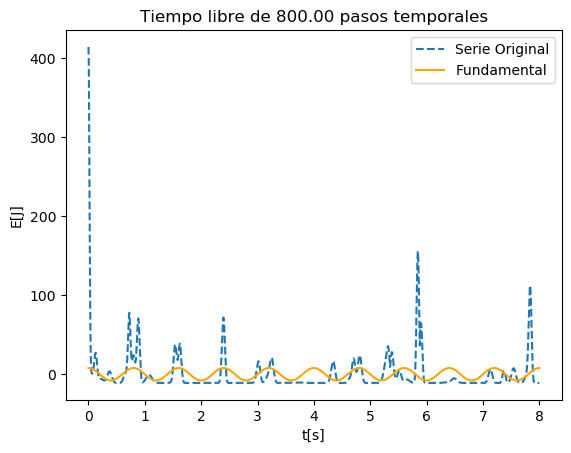

In [22]:
#f) Hacer el gráfico

maskright = np.abs(Frequencies) < FreqMax
maskleft = np.abs(Frequencies) > FreqMax

fft[maskright] = 0
fft[maskleft] = 0

Fundamental = np.fft.ifft(fft)

plt.figure()
plt.plot(t,Ep, linestyle='--',label='Serie Original')
plt.plot(t,np.real(Fundamental), linestyle='-', label='Fundamental', color='Orange')
plt.legend()
plt.title('Tiempo libre de 800.00 pasos temporales')
plt.xlabel("t[s]")
plt.ylabel("E[J]")
plt.show()
plt.savefig('TeimpoLibre.png')